# CoronaVirus Analysis and Forecasting using Data Science

Global Data Source: Johns Hopkins CSSE Data Repository - https://github.com/CSSEGISandData/COVID-19  
US States Data Source: Covid Tracking Project - https://covidtracking.com/data/  

*Note that since 3/23 John Hopkins no longer tracks historic regional data including US States.  A separate dataset is required for US State data (Covid Tracking), and as such, there may be minor differences when comparing the combined individual state data (Covid Tracking Project dataset) against the Global US stats (John Hopkins dataset)*

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()

## Get the Datasets

### Dataset 1. Global (John Hopkins)

Live data is stored in files named MM-DD-YYYY.csv, so get the current date for live data updates.  
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

In [2]:
# Create the filename to load based on today's date

day = str(datetime.now().day) if datetime.now().day >= 10 else "0" + str(datetime.now().day)
month = str(datetime.now().month) if datetime.now().month >= 10 else "0" + str(datetime.now().month)
year = str(datetime.now().year)

jh_date = month + "-" + day + "-" + year
jh_date

'03-29-2020'

In [3]:
#  First try to pull today's data, but if it's not available yet, pull yesterday's data
try:
    fileURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + jh_date + ".csv"
    global_curr = pd.read_csv(fileURL)
except:
    day = str(datetime.now().day - 1)
    jh_date = month + "-" + day + "-" + year
    fileURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + jh_date + ".csv"
    global_curr = pd.read_csv(fileURL)
    
jh_date

'03-28-2020'

In [4]:
# Check out the first 5 rows to make sure the data loaded correctly
global_curr.head()

FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-03-28 23:05:37   
1  22001.0     Acadia       Louisiana             US  2020-03-28 23:05:37   
2  51001.0   Accomack        Virginia             US  2020-03-28 23:05:37   
3  16001.0        Ada           Idaho             US  2020-03-28 23:05:37   
4  19001.0      Adair            Iowa             US  2020-03-28 23:05:37   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707          3       0          0       0   
1  30.295065  -92.414197          9       1          0       0   
2  37.767072  -75.632346          2       0          0       0   
3  43.452658 -116.241552         76       0          0       0   
4  41.330756  -94.471059          1       0          0       0   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  
3                 Ada, Idaho, US  
4                Adair, Iowa, US

**Also pull the global historic time series data.  Note that it won't have live data from today.**

In [5]:
global_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
global_confirmed.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0  ...       22       24       24       40   
1        0        0        0  ...       64       70       76       89   
2        0        0        0  ...       87       90      139      201   
3        0        0        0  ...       53       75       88      113   
4        0        0        0  ...        0        1        2        2   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  
0       40       74       84       94      110      110  
1      104      123      146      174      186      197  
2      230      264      302      367      409      454  
3      133      164      188      224      267      308  
4        3        3        3        4        4        5  

[5 rows x 71 columns]

In [6]:
global_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

### Dataset 2. US States (Covid Tracking Project)

The Covid Tracking Project stores data in both API (JSON) and CSV formats.  We'll be loading the CSV files into Pandas here.  
https://covidtracking.com/api/  

States current - /api/states | [CSV](https://covidtracking.com/api/states.csv)  
States daily 4 pm ET - /api/states/daily | [CSV](http://covidtracking.com/api/states/daily.csv)  
States info - /api/states/info | [CSV](https://covidtracking.com/api/states/info.csv)  
US current - /api/us | [CSV](https://covidtracking.com/api/us.csv)  
US daily - /api/us/daily | [CSV](https://covidtracking.com/api/us/daily.csv)  
Counties- /api/counties | [CSV](https://covidtracking.com/api/counties.csv)  

In [7]:
states_curr = pd.read_csv('https://covidtracking.com/api/states.csv', index_col='state')

In [8]:
states_hist = pd.read_csv('http://covidtracking.com/api/states/daily.csv')

In [9]:
us_curr = pd.read_csv('https://covidtracking.com/api/us.csv')
us_curr

positive  negative  posNeg  hospitalized  death   total  \
0    121468    640547  762015         16983   2045  762015   

                                       hash lastModified  \
0  872544e487a3f91730b1aa2c0c268041aee92a14    3/29/2020   

                                               notes  totalTestResults  
0  Please stop using the "total" and "posNeg" fie...            762015

In [10]:
us_hist = pd.read_csv('https://covidtracking.com/api/us/daily.csv')

## Data Wrangling

Get the data into a format where it's machine readable for analytics and forecasting

In [11]:
# Covid Tracking Project - US State data.  Look at first 5 rows before reformatting
states_hist.head()

date state  positive  negative  pending  hospitalized  death  total  \
0  20200328    AK      85.0    2836.0      NaN           5.0    2.0   2921   
1  20200328    AL     696.0    4184.0      NaN           NaN    3.0   4880   
2  20200328    AR     404.0    2938.0      0.0          48.0    5.0   3342   
3  20200328    AS       0.0       NaN      0.0           NaN    0.0      0   
4  20200328    AZ     873.0    7455.0     21.0           NaN   15.0   8349   

                                       hash           dateChecked  \
0  edb7e6bcde715f8bbea31547e99aa8b4712ea5fb  2020-03-28T20:00:00Z   
1  c9986a845bd2f8f9c9a4294a8e5d66a01ee6aadf  2020-03-28T20:00:00Z   
2  47d05acbbf2fbb56ddd9c44c3b9e204d10f050c3  2020-03-28T20:00:00Z   
3  c6fae61e10e1a1154e848a52a3665304ec76dd53  2020-03-28T20:00:00Z   
4  9b04c4c073cb904f606bb9efb2ac77c8ecc810cd  2020-03-28T20:00:00Z   

   totalTestResults  fips  deathIncrease  hospitalizedIncrease  \
0              2921     2            1.0                   2.0   
1              4880     1            0.0                   0.0   
2              3342     5            2.0                   0.0   
3                 0    60            0.0                   0.0   
4              8328     4            2.0                   0.0   

   negativeIncrease  positiveIncrease  totalTestResultsIncrease  
0             517.0              16.0                     533.0  
1               0.0             109.0                     109.0  
2            1393.0              23.0                    1416.0  
3               0.0               0.0                       0.0  
4               0.0             137.0                     137.0

In [12]:
# change YYYYMMDD to YYYY-MM-DD and convert to datetime

states_hist['date'] = states_hist['date'].apply(lambda x : str(x)[:4] + "-" + str(x)[4:6] + "-" + str(x)[6:8])
states_hist['date'] = states_hist['date'].apply(lambda x : pd.to_datetime(x) )

In [13]:
# Now set the date as the index

states_hist.set_index('date', inplace=True)
states_hist.sort_index(inplace=True)

In [14]:
states_hist.head()

state  positive  negative  pending  hospitalized  death  total  \
date                                                                        
2020-03-04    WI       1.0      19.0      6.0           NaN    NaN     26   
2020-03-04    AZ       2.0      27.0      5.0           NaN    NaN     34   
2020-03-04    CA      53.0     462.0      NaN           NaN    NaN    515   
2020-03-04    FL       2.0      24.0     16.0           NaN    NaN     42   
2020-03-04    GA       2.0       NaN      NaN           NaN    NaN      2   

                                                hash           dateChecked  \
date                                                                         
2020-03-04  0f8cc0d051348c50905a5d5b43ba3c5e23897523  2020-03-04T21:00:00Z   
2020-03-04  aa32357b3ae42f0446a5286a589cfdf4ccffd89c  2020-03-04T21:00:00Z   
2020-03-04  10e497c4befea3c4ba15820ec029ed6606ac592e  2020-03-04T21:00:00Z   
2020-03-04  a34c4ef28d5ac3e25db53cb49babd89ec99ee2a8  2020-03-04T21:00:00Z   
2020-03-04  176fe4068528bb2e51669ce5baaecd7b46359fdc  2020-03-04T21:00:00Z   

            totalTestResults  fips  deathIncrease  hospitalizedIncrease  \
date                                                                      
2020-03-04                20    55            NaN                   NaN   
2020-03-04                29     4            NaN                   NaN   
2020-03-04               515     6            NaN                   NaN   
2020-03-04                26    12            NaN                   NaN   
2020-03-04                 2    13            NaN                   NaN   

            negativeIncrease  positiveIncrease  totalTestResultsIncrease  
date                                                                      
2020-03-04               NaN               NaN                       NaN  
2020-03-04               NaN               NaN                       NaN  
2020-03-04               NaN               NaN                       NaN  
2020-03-04               NaN               NaN                       NaN  
2020-03-04               NaN               NaN                       NaN

In [15]:
# get the latest date so we can pull recent data as needed
ctp_date = states_hist.index.max()
ctp_date

Timestamp('2020-03-28 00:00:00')

In [16]:
# get a list of the top 10 states using current data
top_states = states_curr['positive'].sort_values(ascending=False).nlargest(15).index
top_states

Index(['NY', 'NJ', 'MI', 'CA', 'WA', 'MA', 'FL', 'IL', 'LA', 'PA', 'GA', 'CO',
       'TX', 'CT', 'OH'],
      dtype='object', name='state')

In [17]:
# Now create a pivot tables for positive, negative, pending, hospitalized, death, total

states_positive = pd.pivot_table(states_hist, index='date', columns='state', values='positive')
states_negative = pd.pivot_table(states_hist, index='date', columns='state', values='negative')
states_pending = pd.pivot_table(states_hist, index='date', columns='state', values='pending')
states_hospitalized = pd.pivot_table(states_hist, index='date', columns='state', values='hospitalized')
states_deaths = pd.pivot_table(states_hist, index='date', columns='state', values='death')
states_tests = pd.pivot_table(states_hist, index='date', columns='state', values='total')

## Start examining the data - Exploratory Data Analysis (EDA)

In [18]:
# Total Global confirmed cases
global_curr['Confirmed'].sum()

660706

In [19]:
# Total Global deaths
global_curr['Deaths'].sum()

30652

In [20]:
# Total US confirmed cases
global_curr[global_curr["Country_Region"]=='US']['Confirmed'].sum()

121478

In [21]:
# Total US Deaths (per JH dataset)
global_curr[global_curr["Country_Region"]=='US']['Deaths'].sum()

2026

In [22]:
# Make a Pivot Table to summarize the global confirmed cases by Country
date_columns = global_confirmed.iloc[:, 4:].columns
confirmed_country = pd.pivot_table(global_confirmed, index=['Country/Region'], values=date_columns, aggfunc=np.sum)
confirmed_country = confirmed_country.transpose()
confirmed_country.index = pd.to_datetime(confirmed_country.index)
confirmed_country = confirmed_country.sort_index()

In [23]:
# Top countries by confirmed count as of latest date
top_countries = confirmed_country.loc[jh_date].sort_values(ascending=False).nlargest(20)
top_countries

Country/Region
US                121478
Italy              92472
China              81999
Spain              73235
Germany            57695
France             38105
Iran               35408
United Kingdom     17312
Switzerland        14076
Netherlands         9819
Korea, South        9478
Belgium             9134
Austria             8271
Turkey              7402
Canada              5576
Portugal            5170
Norway              4015
Brazil              3904
Australia           3640
Israel              3619
Name: 2020-03-28 00:00:00, dtype: int64

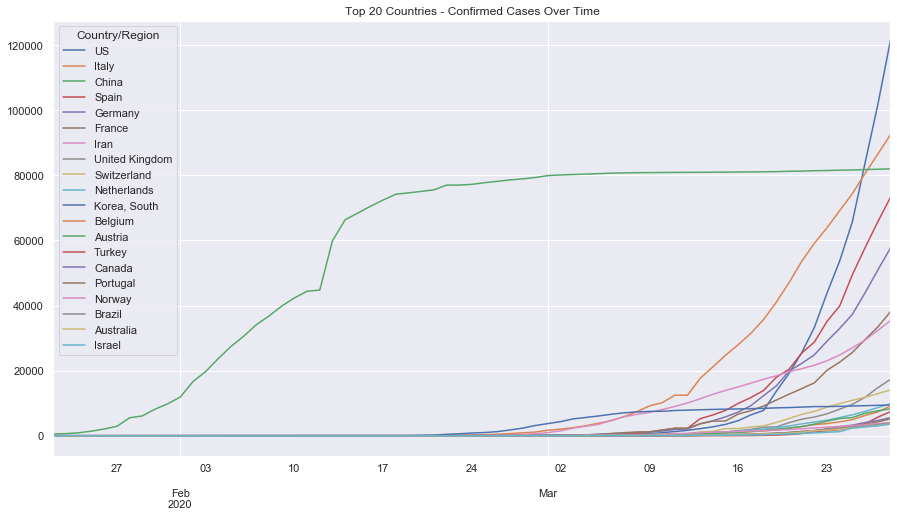

In [24]:
# Plot the top 20 countries confirmed infections over time
confirmed_country[top_countries.index].plot(figsize=(15,8), title="Top 20 Countries - Confirmed Cases Over Time")

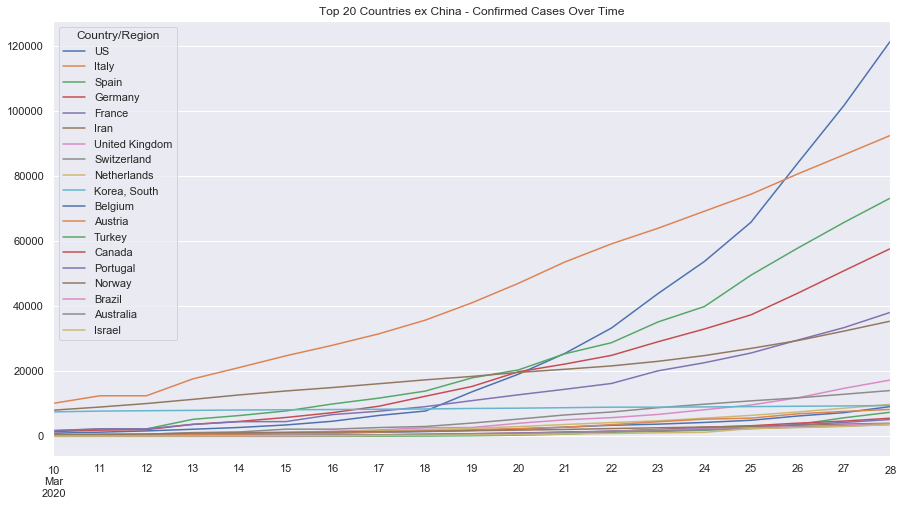

In [33]:
# Same chart but excluding China and starting on Mar 10 to zoom in
confirmed_country[top_countries.index].loc['03/10/2020':, top_countries.index != 'China'].plot(figsize=(15,8), title="Top 20 Countries ex China - Confirmed Cases Over Time")

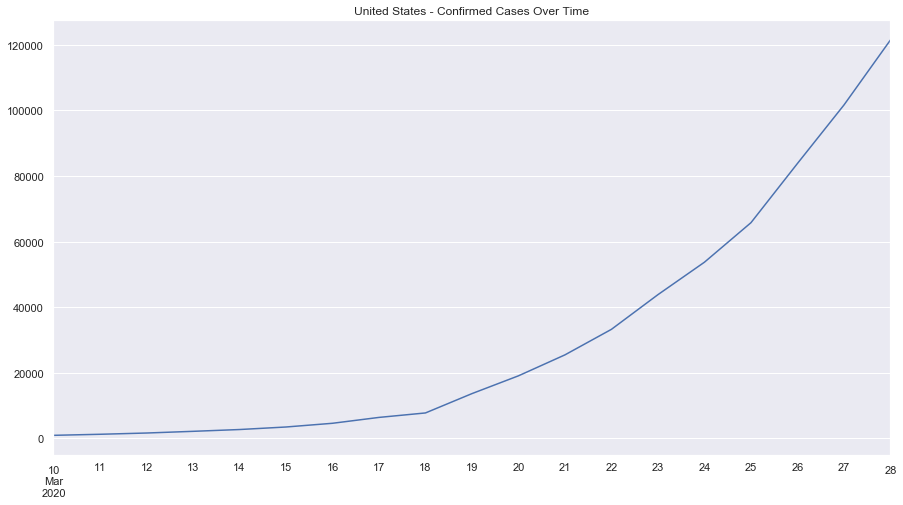

In [26]:
# Same chart but US only and starting on Mar 10 to zoom in
confirmed_country[top_countries.index].loc['3/10/2020':, 'US'].plot(figsize=(15,8), title="United States - Confirmed Cases Over Time")

In [27]:
# Top 10 New York counties with the most confirmed cases (JH Dataset)
global_curr[global_curr["Province_State"]=='New York'][['Admin2', 'Confirmed', 'Deaths']].sort_values(by='Confirmed', ascending=False).head(10)

Admin2  Confirmed  Deaths
2066  New York City      29776     517
3050    Westchester       7875      10
2045         Nassau       5537      27
2720        Suffolk       4138      30
2460       Rockland       1896       8
2145         Orange       1101       4
881            Erie        318       6
832        Dutchess        262       2
1967         Monroe        202       5
27           Albany        195       0

In [28]:
# Top 5 California counties with the most confirmed cases (JH Dataset)
global_curr[global_curr["Province_State"]=='California'][['Admin2', 'Confirmed', 'Deaths']].sort_values(by='Confirmed', ascending=False).head(5)

Admin2  Confirmed  Deaths
1716    Los Angeles       1465      26
2529    Santa Clara        591      25
2507      San Diego        413       6
2142         Orange        403       4
2508  San Francisco        308       4

In [29]:
# Top 5 Massachusetts counties with the most confirmed cases (JH Dataset)
global_curr[global_curr["Province_State"]=='Massachusetts'][['Admin2', 'Confirmed', 'Deaths']].sort_values(by='Confirmed', ascending=False).head(5)

Admin2  Confirmed  Deaths
2719     Suffolk        843       3
1915   Middlesex        842       5
2090     Norfolk        490       8
887        Essex        472       3
2867  Unassigned        356       9

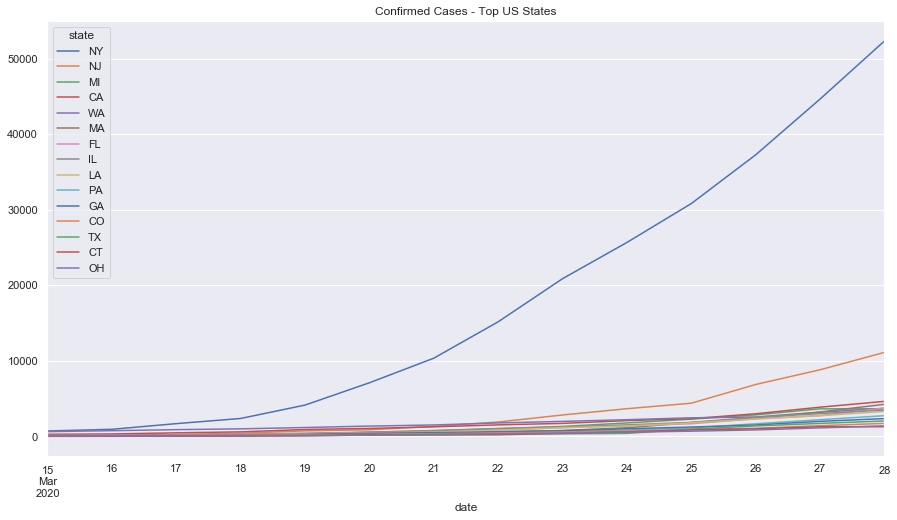

In [30]:
# Chart the top states with confirmed positive
states_positive[top_states].loc['3/15/2020':, :].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

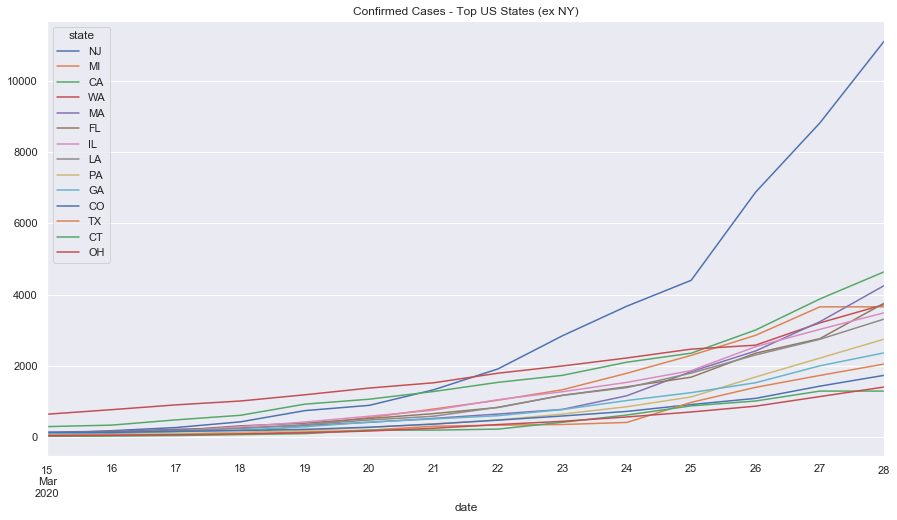

In [31]:
# The same chart but this time without NY to zoom in on the others
states_positive[top_states].loc['3/15/2020':, top_states != 'NY'].plot(title='Confirmed Cases - Top US States (ex NY)', figsize=(15,8))

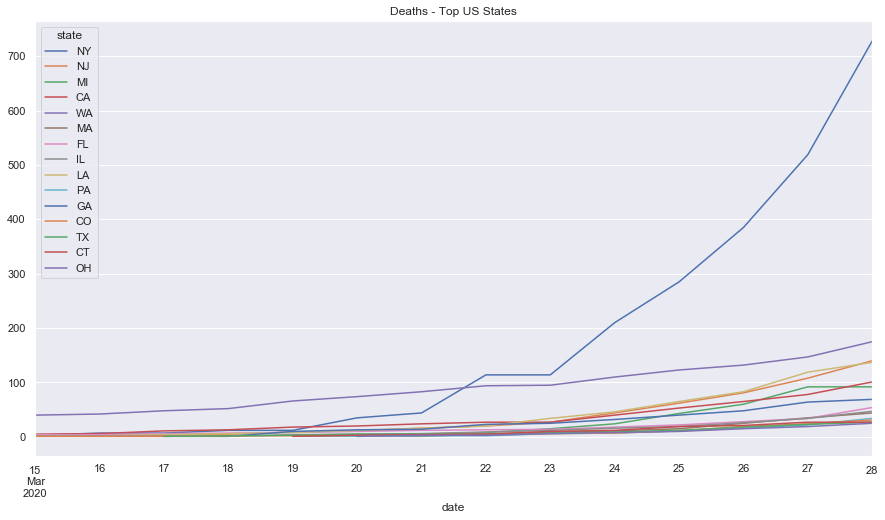

In [32]:
# Chart the top states of by # of deaths
states_deaths[top_states].loc['3/15/2020':, :].plot(title='Deaths - Top US States', figsize=(15,8))

**TODO NEXT:**  
- More EDA and Data Viz
- Perform forecasting using the historic time series data
- Get population data for each country / state and add to this report (may be easiest to just put in a csv file)
  - Also population density if possible
- Add metrics based on poulation data (% of population infected, etc)
- Model out different scenarios: 
  - No changes
  - Lockdown
  - Extensive testing
  - Mandatory quarantines
  - Containment effectiveness score for each country (estimated)
  - Cure discovered
- Look into using Unity to model out scenarios, using simulated humans and the Global / US map tool I have